**Scottie YANG Miaoyi**

Fall 2021

CS 251: Data Analysis and Visualization

Project 5: Clustering

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

import kmeans

plt.style.use(['seaborn-colorblind', 'seaborn-darkgrid'])
plt.rcParams.update({'font.size': 20})

np.set_printoptions(suppress=True, precision=5)

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

## Task 1: K-means clustering

In this task, you will implement the K-means clustering algorithm and test your code on simple test data.

### 1a) Import `super_simple` data

- In the cell below, use pandas to load in `super_simple.csv` (30 x,y values), convert the Dataframe to a ndarray.
- Create a scatter plot below to see what the data look like.

In [2]:
import pandas as pd

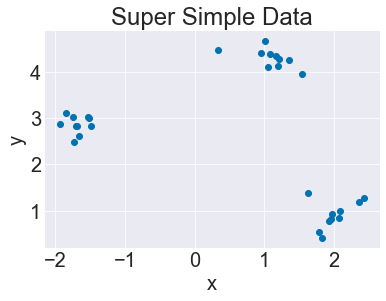

In [3]:
super_simple = pd.DataFrame(pd.read_csv("data/super_simple.csv")).to_numpy()

plt.scatter(super_simple[:,0], super_simple[:,1])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Super Simple Data')
plt.show()

### 1b) Implement and test core K-means methods

In this task, you will implement the methods needed to cluster a dataset using K-means. The goal of this subtask is to create a scatterplot with each data sample color-coded based on the cluster it belongs to. You will be testing on the `super_simple` data.

In `kmeans.py` implement the following methods, using the following test code to help you out along the way:
- `set_data`: Update the data stored by the k-means clustering object.
- `get_data`: Return a copy of the data.
- `dist_pt_to_pt`: Compute the Euclidean distance from one data sample to one other. See below for formula.
- `dist_pt_to_centroids`: Compute the distance from one data sample to all the cluster centroids.
- `initialize`: Initalize K-means by setting the initial centroids
- `update_labels`: Assign each data sample to the nearest centroid
- `update_centroids`: Calculate each cluster's centroid, given the data samples that are assigned to it.
- `inertia`: Calculate the mean squared distance between each data sample and its (nearest) centroid. This is a 'quality of clustering' performance metric for analysis
- `cluster`: Run K-means to cluster the data. This is the actual method you call to do the clustering (above methods are helper methods).
- `plot_clusters`: Creates a scatterplot of the data (2D only) with data assigned to each cluster sharing the same color.

**Formula for Euclidean distance:**
$$dist \left (\vec{p_0}, \vec{p_1} \right ) = \sqrt{\left (d_{0} - e_{0} \right )^2 + \left (d_{1} - e_{1} \right )^2  + \ldots}$$ for data samples $\vec{p_0} = \left (d_{0}, d_{1}, \ldots \right )$ and $\vec{p_1} = \left (e_{0}, e_{1}, \ldots \right )$

#### Test constructor

In [4]:
cluster = kmeans.KMeans(super_simple)
print(f'Data isnt none? {np.all(cluster.data != None)}')
print(f'Data num samples isnt none? {np.all(cluster.num_samps != None)}')
print(f'Data num samples is {cluster.num_samps} and should be 30.')
print(f'Data num features isnt none? {np.all(cluster.num_features != None)}')
print(f'Data num features is {cluster.num_features} and should be 2.')



Data isnt none? True
Data num samples isnt none? True
Data num samples is 30 and should be 30.
Data num features isnt none? True
Data num features is 2 and should be 2.


#### Test `get_data`

In [5]:
super_simple_cpy = cluster.get_data()
super_simple_cpy[0,:] = -99
if np.all(cluster.data[0,:] == -99):
    print('You didnt return a copy of the data! Re-import the super_simple data and try again...')
else:
    print('All good!')

All good!


#### Test `dist_pt_to_pt`

In [6]:
a = np.array([1, 2, 3, 4])
b = 4*a
print(f'Your pt-to-pt distance is {cluster.dist_pt_to_pt(a, b)}')
print(f'Correct pt-to-pt distance is {np.linalg.norm(a-b)}')

Your pt-to-pt distance is 16.431676725154983
Correct pt-to-pt distance is 16.431676725154983


#### Test `dist_pt_to_centroids`

In [7]:
test_pt = np.array([[1, 2]])
test_centroids = np.array([[9, 9], [11, 11], [0, 0]])
print(f'Your pt-to-centroids distance is {cluster.dist_pt_to_centroids(test_pt.flatten(), test_centroids)}')
print(f'Correct pt-to-centroids distance is {distance.cdist(test_pt, test_centroids)[0]}')

Your pt-to-centroids distance is [10.63015 13.45362  2.23607]
Correct pt-to-centroids distance is [10.63015 13.45362  2.23607]


#### Test `initialize`

In [8]:
test_k = 3
init_centroids = cluster.initialize(test_k)
print(f'Initial cluster centroids shape is:\n{init_centroids.shape} and should be (3, 2)')

Initial cluster centroids shape is:
(3, 2) and should be (3, 2)


#### Test `assign_labels`

In [9]:
# Consistently set initial centroids for test
init_centroids = np.array([[ 0.338, 4.4672], [-1.8401, 3.1123], [1.7931, 0.5427]])

new_labels = cluster.assign_labels(init_centroids)
print(f'After the first assign data label step, 1st 10 of your cluster assignments are:\n{new_labels[:10]}')
print('Your 1st 10 cluster assignments should be:\n[0 1 1 1 2 0 2 1 2 1]')

After the first assign data label step, 1st 10 of your cluster assignments are:
[0 1 1 1 2 0 2 1 2 1]
Your 1st 10 cluster assignments should be:
[0 1 1 1 2 0 2 1 2 1]


#### Test `update_centroids`

In [10]:
new_centroids, diff_from_prev_centroids = cluster.update_centroids(test_k, new_labels, init_centroids)
print(f'After the first centroid update, your cluster assignments are:\n{new_centroids}')
print(f'Your difference from previous centroids:\n{diff_from_prev_centroids}')

After the first centroid update, your cluster assignments are:
[[ 1.09087  4.29295]
 [-1.68133  2.85917]
 [ 2.00717  0.9184 ]]
Your difference from previous centroids:
[[ 0.75287 -0.17425]
 [ 0.15877 -0.25313]
 [ 0.21407  0.3757 ]]


You should see:

    After the first centroid update, your cluster assignments are:
        [[ 1.09087  4.29295]
         [-1.68133  2.85917]
         [ 2.00717  0.9184 ]]
    Your difference from previous centroids:
        [[ 0.75287 -0.17425]
         [ 0.15877 -0.25313]
         [ 0.21407  0.3757 ]]

#### Test `inertia`

In [11]:
cluster.centroids = new_centroids
cluster.data_centroid_labels = new_labels
print(f'After the first test k-means update, your inertia is:\n{cluster.compute_inertia()}\nIt should be\n0.10738760429999998')

After the first test k-means update, your inertia is:
0.10738760429999998
It should be
0.10738760429999998


#### Test `plot_clusters` and `cluster`

In the cell below:

- Run K-means on the `super_simple` dataset, picking $k$ that makes sense.
- Run `plot_clusters` to generate a scatterplot. Make sure that the cluster assignment looks like the following image:

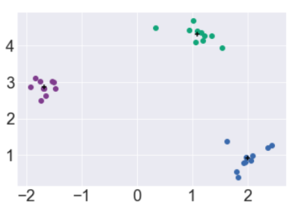

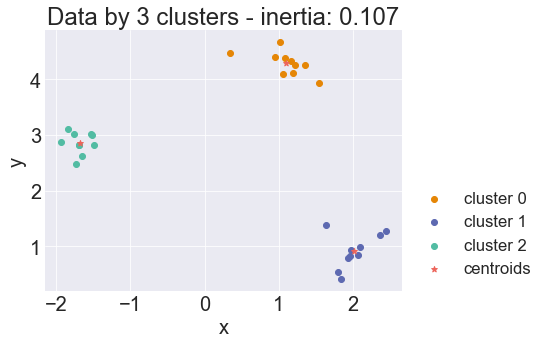

In [12]:
np.random.seed(0)

cluster1 = kmeans.KMeans(super_simple)
cluster1.cluster(k=3)
cluster1.plot_clusters()
plt.show()

### 1c) Determining the number of clusters $k$

In this task, you will explore how to determine the number of clusters in a dataset. This is the first step in a two-step implementation. For this simple data set, the clusters are not as sensitive to the initial conditions (randomly chosen centroids) as for other data. We will be making the elbow plot with just one run of kmeans per number of clusters.

- Implement `elbow_plot` in `kmeans.py`.
- Create an elbow plot below for the `super_simple` dataset. It should look like the below image.

**NOTE:** Make sure to include a meaningful x label, y label, and x tick marks.

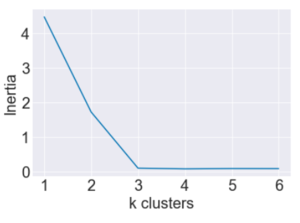

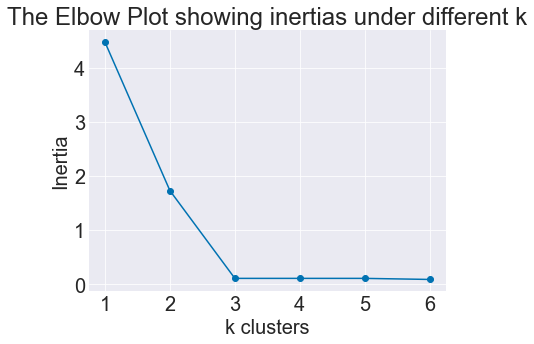

In [15]:
cluster1.elbow_plot(max_k = 6)
plt.show()

**Question 1:** How many clusters are there in the `super_simple` data, based on the elbow plot that you made? Briefly explain how you determined this.

**Answer:** **Answer:** There are persumably 3 clusters in the data. The is based on the fact that the elbow plot becomes flat when k passes 3, and when k is 3 it has a low inertia. More ks don’t do any good.

#### Determine number of clusters in `five_blobs` dataset

- Load in the `five_blobs` dataset.
- Repeat 5 times:
    - Run K-means on it.
    - Create a scatterplot to visualize the clustering.
    - Print the inertia or include it in the title

**NOTE:** Keep the random seed line in each of the 5 cells below.

In [13]:
# Load in the data and put it into a matrix in this cell
five_blobs = pd.DataFrame(pd.read_csv("data/five_blobs.csv")).to_numpy()

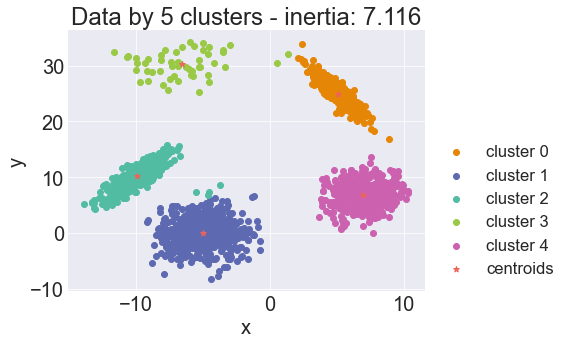

In [155]:
# Run the clustering algorithm and plot the results for one seed.
np.random.seed(0)

cluster2 = kmeans.KMeans(five_blobs)
#Run K-means on it
cluster2.cluster(k=5)
#Create a scatterplot to visualize the clustering
cluster2.plot_clusters()
plt.show()

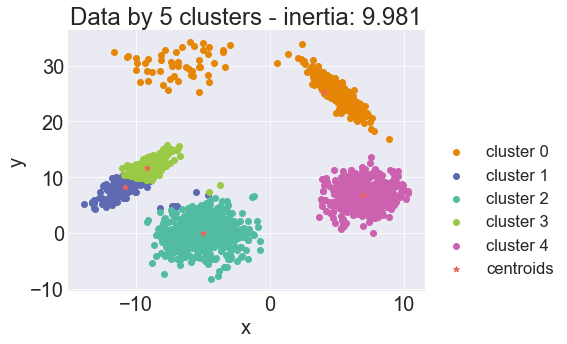

In [156]:
# Run the clustering algorithm and plot the results for a second seed.
np.random.seed(1)

cluster2 = kmeans.KMeans(five_blobs)
#Run K-means on it
cluster2.cluster(k=5)
#Create a scatterplot to visualize the clustering
cluster2.plot_clusters()
plt.show()

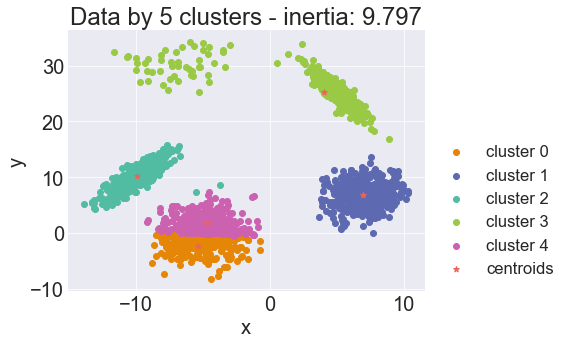

In [157]:
# Run the clustering algorithm and plot the results for a third seed.
np.random.seed(2)

cluster2 = kmeans.KMeans(five_blobs)
#Run K-means on it
cluster2.cluster(k=5)
#Create a scatterplot to visualize the clustering
cluster2.plot_clusters()
plt.show()

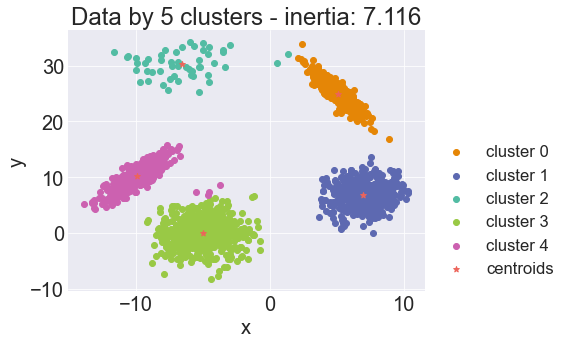

In [158]:
# Run the clustering algorithm and plot the results for a fourth seed.
np.random.seed(3)

cluster2 = kmeans.KMeans(five_blobs)
#Run K-means on it
cluster2.cluster(k=5)
#Create a scatterplot to visualize the clustering
cluster2.plot_clusters()
plt.show()

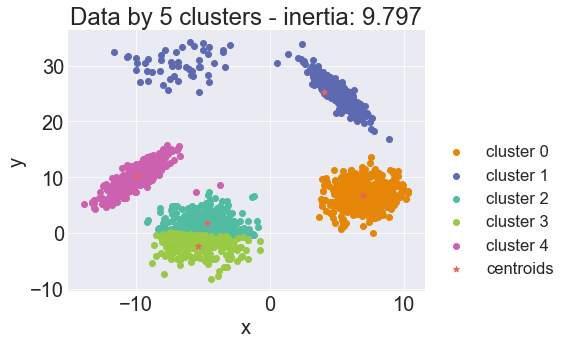

In [159]:
# Run the clustering algorithm and plot the results for a fifth seed.
np.random.seed(4)

cluster2 = kmeans.KMeans(five_blobs)
#Run K-means on it
cluster2.cluster(k=5)
#Create a scatterplot to visualize the clustering
cluster2.plot_clusters()
plt.show()

**Question 2:** What's wrong with clusters shown in the scatterplots? Why does it happen? Does the value of the inertia make sense for each of the images?

**Answer:** The clusters assigned don't align with the visually concentrated clusters, and some centroids are far from the visual clusters and are between two visual clusters. It happens while the initialization goes a bit too cumulated. The value of the inertia makes sense, while lower inertia has more accurate classification.

#### Create an initial elbow plot for the five_blobs dataset ####
Create an elbow plot (given the initial implementation) showing the inertia with different 𝑘 values.

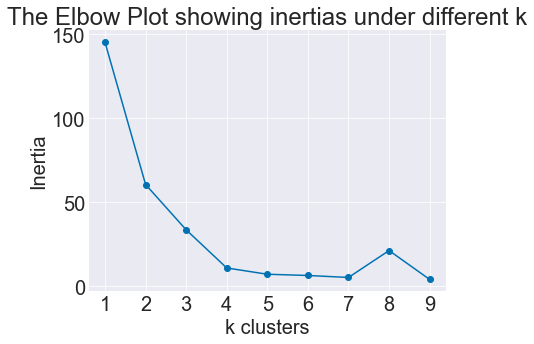

In [140]:
#Create an elbow plot showing the inertia with different k values
cluster2.elbow_plot(max_k = 9)
plt.show()

**Question 3:** An elbow plot should show that increasing the number of clusters decreases the inertia. Does this plot have that trend? If not, why not?

**Answer:** It should shows the trend before k=5, but it's hard to decide because the inertias of k exceeds 5 fluctuate. Because we don't have a good initialization.

#### Run K-means multiple times, save the best clustering

To address the problems faced above, we can run K-means multiple times and take the best results for our clustering.

- Implement `cluster_batch`
- Run `cluster_batch` with a sensible $k$ value and `n_iter=10`
- Run `plot_clusters` again.
- Report the inertia either by printing it out or adding to the figure title.

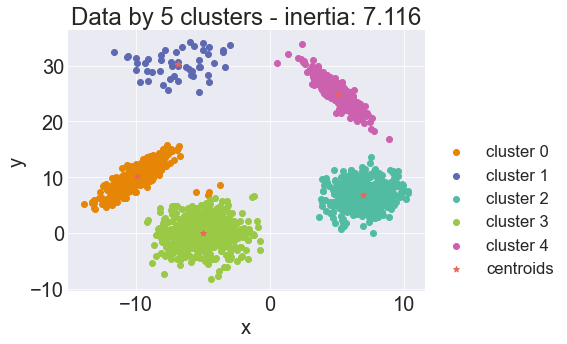

In [117]:
np.random.seed(0)
cluster3 = kmeans.KMeans(five_blobs)

#Implement cluster_batch to run K-means multiple times with a sensible k value
cluster3.cluster_batch(k=5, n_iter = 10)
#Run plot_clusters again
cluster3.plot_clusters()
plt.show()

**Question 4:** Did the clustering improve? Why?

**Answer:** The clustering improves a lot. It is because the results of K-mean would be different under different initial state (initial random centroids), so it's good to run the K-mean for multiple times with different initial state and keep the one with lowest inertia. 

#### Improve the elbow plot for the `five_blobs` dataset

This is the second step in a two-step implementation of the `elbow_plot`. We have seen that k-means clustering can be sensitive to initial conditions, and that it is helpful to run it multiple times to find the best clusters. In this step, we alter `elbow_plot` to call `cluster_batch` instead of `cluster`.

- Add a parameter `n_iter` to `elbow_plot` in `kmeans.py`. Give it a default value of 1. (And don't forget to update the docstring to include the new parameter!)
- Change the `elbow_plot` code to call `cluster_batch` instead of `cluster`.
- Create an elbow plot showing the inertia with different $k$ values. This could take a long time to run, so we suggest using `n_iter=10` and a maximum `k` of 10.

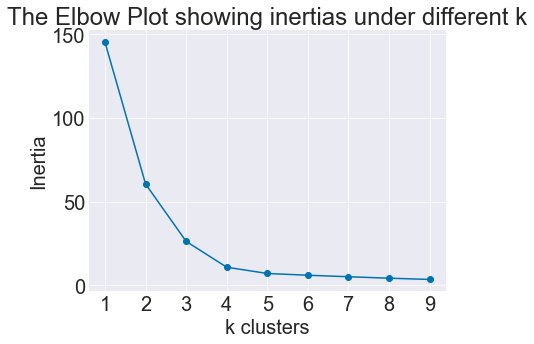

In [128]:
cluster3.elbow_plot(max_k = 9, n_iter = 10)
plt.show()

**Question 5:** Does this elbow plot look more like we expected than the original? How many clusters are there? Is it easy or hard to determine? Does it make sense?

**Answer:** Yes, thanks god it improves and look better. Seems like we have 4 or 5, and it makes sense while it the cluster over 5 could never seem improvements.

## Task 2: Image Segmentation and compression

In this task, you will apply K-means to one image and to compress it (*image compression*). The idea is that you will find $k$ RGB color centroids in the image, then replace each pixel in the image with the nearest centroid. This will compress an image, by only using $k$ colors to represent it. You can also think of this as doing a simple image region segmentation: regions with similar colors will belong to the same cluster. It also makes some cool retro effects!

### 2a) Load in baby bird image

- Use the imported `imread` method below to load in the `baby_bird.jpg` image.
- Use `plt.imshow` to display it in the notebook below. Turn off plot ticks!

In [14]:
from matplotlib.image import imread

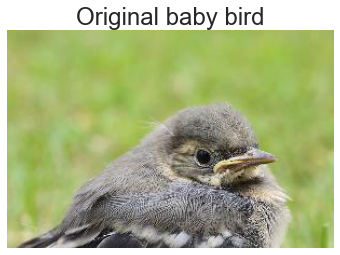

In [15]:
baby_bird = plt.imread('data/baby_bird.jpg')
original_bird_shape = baby_bird.shape

plt.imshow(baby_bird)
plt.title('Original baby bird')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### 2b) Preprocess image

- Fill in the function below to collapse (flatten) the 2D image into a big 1D vector of RGB values. For example, for the bird image, your function should take the shape `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`.
- Reshape the bird image from `(num_rows, num_cols, rgb)` and convert it to `(num_rows*num_cols, rgb)`. Final shape for baby bird image should be: `(61206, 3)`

In [16]:
def flatten(img):
    '''Flattens `img` to N 1D vectors.
    For example, for an RGB image, `(num_rows, num_cols, rgb)` -> `(num_rows*num_cols, rgb)`.
    
    Parameters:
    -----------
    img: ndarray. shape=(num_rows, num_cols, rgb)
    
    Returns:
    -----------
    Flattened `img`. ndarray. shape=(num_rows*num_cols, rgb)
    '''
    img_length = img.shape[0]
    img_width = img.shape[1]
    img_rgb = img.shape[2]
    img_vec = img.reshape(img_length * img_width, img_rgb)
    
    return img_vec

In [17]:
baby_bird_vec = flatten(baby_bird)

### 2c) Cluster RGB values in image

- Run K-means on the bird data vector.
- Implement `replace_color_with_centroid`: replace every pixel in the image with the nearest centroid RGB value.
- Compress the image by running `replace_color_with_centroid`.

In [39]:
bird_cluster = kmeans.KMeans(baby_bird_vec)

bird_cluster.cluster(k=2)
bird_cluster.replace_color_with_centroid()

### 2d) Postprocessing and visualization

- Rehape the compressed image data back to its original dimensions.
- Plot it below.

In [40]:
compressed_bird = bird_cluster.get_data().reshape(original_bird_shape)
compressed_bird = np.clip(compressed_bird, 0, 255)

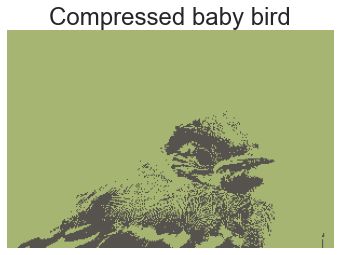

In [41]:
plt.imshow(compressed_bird)
plt.title('Compressed baby bird')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

### 2e) Run K-means and compress an image of your choice

Smaller images run a lot faster.

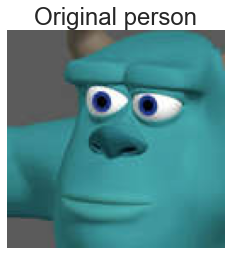

In [25]:
#1. load the image and plot it
person = plt.imread('data/man.jpeg')
original_person_shape = person.shape

plt.imshow(person)
plt.title('Original person')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

In [26]:
#2. flatten the image
person_vec = flatten(person)

In [27]:
#3. cluster the image (3 clusters)
person_cluster = kmeans.KMeans(person_vec)

person_cluster.cluster(k=3)
person_cluster.replace_color_with_centroid()

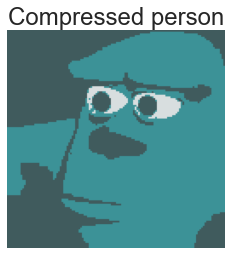

In [28]:
#4. reshape back the image and plot out
compressed_person = person_cluster.get_data().reshape(original_person_shape)
compressed_person = np.clip(compressed_person, 0, 255)

plt.imshow(compressed_person)
plt.title('Compressed person')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

## Extensions

To receive credit for any extension, you must:
- Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
- **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
- Include (*labeled!*) plots and/or numbers to present your results.
- Write up your extensions below or in a separate notebook.

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

### 1) Image compression

- Run K-means on other images and quantify the reduction in space required to store each image (with different values of k).

Count of unique color number value in the original data:  256


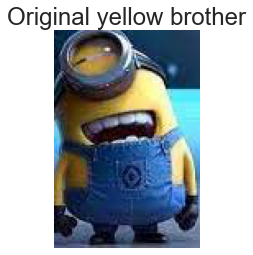

In [32]:
#1. load the image and plot it and save the space required for the image
yellow = plt.imread('data/yellow.jpg')
original_yellow_shape = yellow.shape
original_unique_count = np.unique(yellow).shape[0]
print('Count of unique color number value in the original data: ', original_unique_count)

plt.imshow(yellow)
plt.title('Original yellow brother')
plt.xticks([], [])
plt.yticks([], [])
plt.show()

Originally, there're 256 distinct numbers in this picture that represents the color. Let's see how much this number can be reduced through compression.

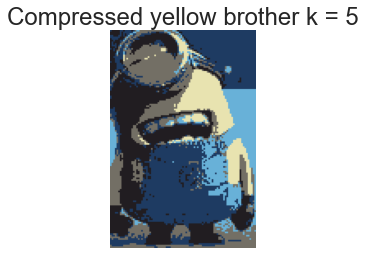

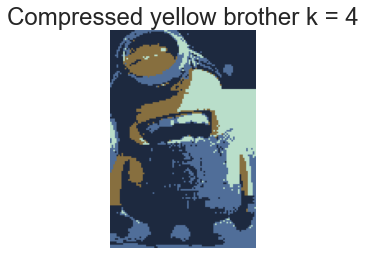

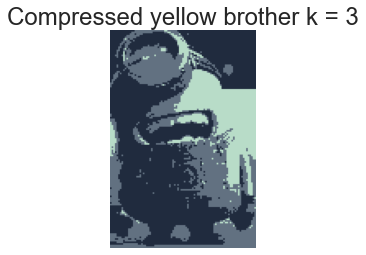

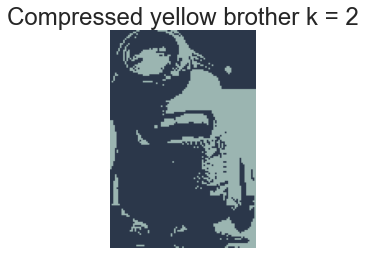

In [34]:
#2. flatten the image
yellow_vec = flatten(yellow)

#3. cluster the image with different k and plot them (and save the unique value of color used in each image)
number_of_color_value = []

for k in reversed(range(2,6)):
    yellow_cluster = kmeans.KMeans(yellow_vec)
    yellow_cluster.cluster(k=k)
    yellow_cluster.replace_color_with_centroid()

    compressed_yellow = yellow_cluster.get_data().reshape(original_yellow_shape)
    compressed_yellow = np.clip(compressed_yellow, 0, 255)
    number_of_color_value.append(np.unique(compressed_yellow).shape[0])
    
    plt.imshow(compressed_yellow)
    title = 'Compressed yellow brother k = ' + str(k)
    plt.title(title)
    plt.xticks([], [])
    plt.yticks([], [])
    plt.show()

#### Although the original colors of the yellow brother are barely recognizable when k = 2, when k = 5, the yellow brother still looks pretty good. Let's see how much space it has saved through this compression. ####

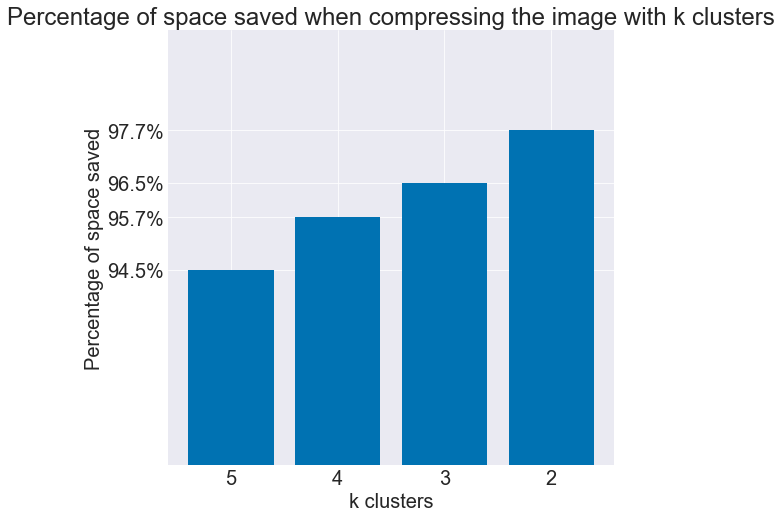

In [35]:
percent_of_space_saves = []
for x in number_of_color_value:
    percent_of_space_saves.append(round((original_unique_count-x)/original_unique_count,3))

percentage = []
for a in percent_of_space_saves:
    percentage.append(str(round(a*100, 1))+'%')

plt.figure(figsize=(8,8))
plt.bar(range(2, 6), percent_of_space_saves)
plt.xticks(range(2, 6), reversed(range(2,6)))
plt.xlabel('k clusters')
plt.yticks(percent_of_space_saves, percentage)
plt.ylim(0.9, 1.0)
plt.ylabel('Percentage of space saved')
plt.title('Percentage of space saved when compressing the image with k clusters')
plt.show()

#### The result is great! When k = 5, the yellow brother picture is still very recognizable, and it has saved 94.5% of space (which means the unique color number value it contains is 94.5% less than the original one). And the space saved increases when k cluster decreases, but the difference is diminishing. ####

### 2) Detect number of clusters in other datasets

- Cluster other datasets and create elbow plots to detect the number of clusters.

### 3) Cluster additional datasets

### 4) Other cluster detection metrics

- Research number-of-clusters detection metrics (e.g. siloutte score) and compare them to inertia on a dataset of your choice. Which does a better job at detecting number of clusters?

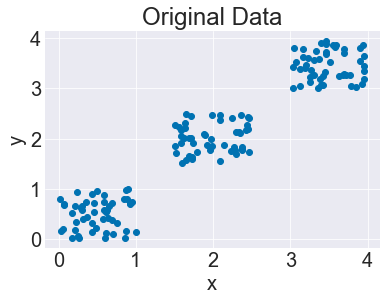

In [36]:
# Extension 4: Selecting the number of clusters with silhouette analysis on KMeans clustering
# Using sklearn package
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Generating some random data
X= np.random.rand(50,2)
A = 1.5 + np.random.rand(50,2)
Y= 3 + np.random.rand(50,2)
Z= np.concatenate((X,A,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

#Plotting the data
plt.title('Original Data')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(Z[0],Z[1])
plt.show()

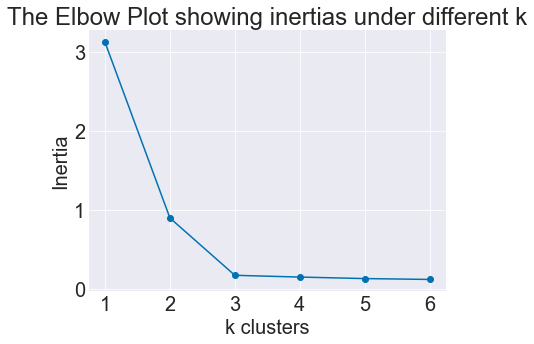

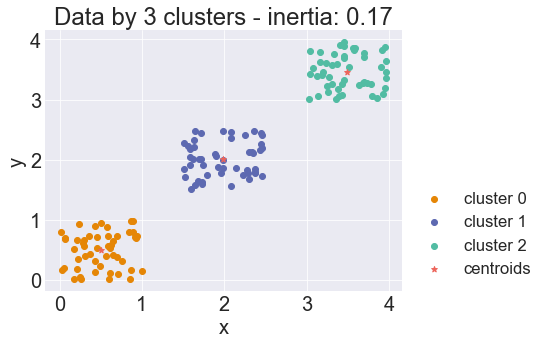

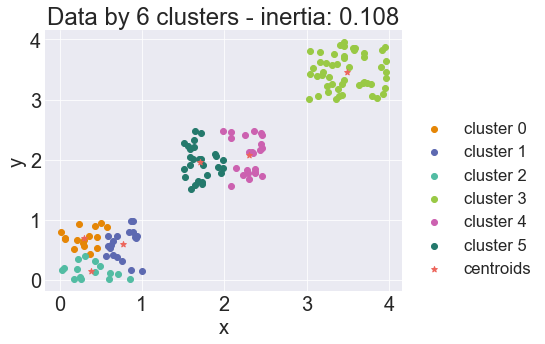

In [37]:
# (1) Deciding the number of clusters using inertia
#running KMean and inertia (with my own codes)
extension4 = kmeans.KMeans(Z.to_numpy())
extension4.elbow_plot(max_k = 6)
plt.show()

#plotting the data with 3 clusters
extension4.cluster(k=3)
extension4.plot_clusters()
plt.show()

#plotting the data with 6 clusters
extension4.cluster(k=6)
extension4.plot_clusters()
plt.show()

#### In this case, even though 3 clusters seem like a good fit, the cluster number of 6 has a lowest inertia. So it'll be difficult to decide how many clusters (k) there should be. ####

In [38]:
#(2) using Silhouette Score to decide k

range_n_clusters = [2, 3, 4, 5, 6]

for k in range_n_clusters:
    KMean= KMeans(n_clusters=k)
    KMean.fit(Z)
    label=KMean.predict(Z)
    print(f'Silhouette Score(k={k}): {silhouette_score(Z, label)}')

Silhouette Score(k=2): 0.5819235261308294
Silhouette Score(k=3): 0.7332537950870959
Silhouette Score(k=4): 0.6220543818523874
Silhouette Score(k=5): 0.5022193389116272
Silhouette Score(k=6): 0.38663755752552587


#### In this case, clearly when the number of clusters is 3, the Silhouette Score is the highest (k=3, score = 0.7332537950870959). On the contrary, the Silhouette Score is very low when k=6. Therefore, we can decide the number of cluster should be 3 (instead of 6). ####